In [1]:
!pip -q install matplotlib
!pip -q install cv
!pip -q install opencv-python
!pip -q install jupyter notebook
!pip -q install progressbar
!pip -q install numpy
!pip -q install tensorflow
#!pip -q install gc
import pip
pip.main(['install','seaborn'])

/Users/sahajpatel/opt/anaconda3/lib/python3.8/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [2]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import image processing libraries
import cv2
from keras.models import load_model
# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import os
from keras.models import Sequential
#from keras.models import predict_classes
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
#import additional libraries
import progressbar
device = "cpu"
print("Packages imported...")
train_dir = '/home/a.kocsis/Final Project/Dataset/asl_alphabet_train/'
model_save_dir = '/home/a.kocsis/Final Project/'

Packages imported...


In [3]:
#reads, resizes, and converts images to RGB which are then appended to arrays images_for_plot and labels_for_plot (may take a while only for visualization)
def data_visualization():
    size_img = 64,64 
    images_for_plot = []
    labels_for_plot = []
    for folder in os.listdir(train_dir):
        for file in os.listdir(train_dir + '/' + folder):
            filepath = train_dir + '/' + folder + '/' + file
            image = cv2.imread(filepath)                         
            final_img = cv2.resize(image, size_img)
            final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
            images_for_plot.append(final_img)
            labels_for_plot.append(folder)
            break
    return images_for_plot, labels_for_plot

In [4]:
images_for_plot, labels_for_plot = data_visualization()
print("labels = ", labels_for_plot)

fig = plt.figure(figsize = (15,15))
def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return

image_index = 0
row = 5
col = 6
for i in range(1,(row*col)):
    plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/a.kocsis/Final Project/Dataset/asl_alphabet_train/'

In [ ]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 29

train_len = 87000 #change this back to 87000, only using subset for kernel testing

def get_data(folder):
    bar = progressbar.ProgressBar(maxval=train_len, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
    bar.start()
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=int)
    cnt = 0
    for folderName in os.listdir(folder): #converts the alphabetical labels to number labels
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = cv2.resize(img_file, (imageSize, imageSize))
                    np_image = np.array(img_file)
                    #np_image = np_image.astype('float32')/255.0
                    img_arr = np_image.reshape((-1, imageSize, imageSize, 3))
                    
                    if cnt < train_len:
                        X[cnt] = img_arr
                        y[cnt] = label
                        cnt += 1
                    else:
                        break
                        break
                        
                    if cnt < train_len:
                        bar.update(cnt)
                    
    return X,y

In [ ]:
X_train, y_train = get_data(train_dir)

Images successfully imported...
The shape of X_train is :  (87000, 64, 64, 3)
The shape of y_train is :  (87000,)
The shape of one image is :  (64, 64, 3)


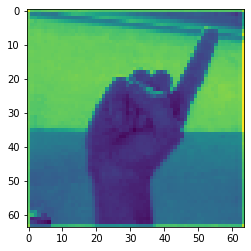

In [ ]:
print("Images successfully imported...")

#sanity check
print("The shape of X_train is : ", X_train.shape)
print("The shape of y_train is : ", y_train.shape)
print("The shape of one image is : ", X_train[0].shape)
plt.imshow(X_train[0, :, :, 0])
plt.show()

In [ ]:
#copies if cells above are changed
X_data = X_train
y_data = y_train
print("Copies made...")

Copies made...


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42,stratify=y_data)

In [ ]:
#onehot encoding
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,29)
y_cat_test = to_categorical(y_test,29)

In [ ]:
print("The shape of X_train is : ", X_train.shape)
print("The shape of y_train is : ", y_cat_train.shape)

The shape of X_train is :  (60900, 64, 64, 3)
The shape of y_train is :  (60900, 29)


In [ ]:
#so that the kernel does not crash
import gc
del X_data
del y_data
gc.collect()


3203

In [ ]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 activation (Activation)     (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                    

2022-04-15 01:18:17.176834: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/a.kocsis/.local/lib/python3.8/site-packages/cv2/../../lib64:/opt/slurm/lib64:/opt/slurm/lib64:
2022-04-15 01:18:17.176870: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-15 01:18:17.176893: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c0700a-s29.ufhpc): /proc/driver/nvidia/version does not exist
2022-04-15 01:18:17.177199: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate com

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_cat_train,
          epochs=50,
          batch_size=64,
          verbose=2,
          validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

Epoch 1/50
952/952 - 63s - loss: 1.3541 - accuracy: 0.6836 - val_loss: 0.2908 - val_accuracy: 0.8986 - 63s/epoch - 67ms/step
Epoch 2/50
952/952 - 57s - loss: 0.1708 - accuracy: 0.9431 - val_loss: 0.1455 - val_accuracy: 0.9526 - 57s/epoch - 60ms/step
Epoch 3/50
952/952 - 57s - loss: 0.1052 - accuracy: 0.9669 - val_loss: 0.0929 - val_accuracy: 0.9722 - 57s/epoch - 59ms/step
Epoch 4/50
952/952 - 57s - loss: 0.0878 - accuracy: 0.9727 - val_loss: 0.0463 - val_accuracy: 0.9854 - 57s/epoch - 60ms/step
Epoch 5/50
952/952 - 57s - loss: 0.0839 - accuracy: 0.9746 - val_loss: 0.0758 - val_accuracy: 0.9761 - 57s/epoch - 60ms/step
Epoch 6/50
952/952 - 56s - loss: 0.0647 - accuracy: 0.9805 - val_loss: 0.1010 - val_accuracy: 0.9708 - 56s/epoch - 59ms/step


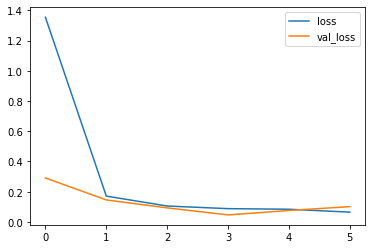

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss','val_loss']].plot()
plt.show()


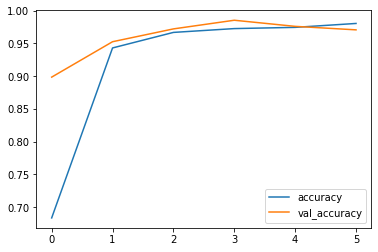

In [ ]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

In [ ]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.10099060088396072, 0.9707663059234619]

In [ ]:
model.save(model_save_dir)
model.save("CNN_model.h5")

2022-04-15 01:24:11.771469: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Assets written to: /home/a.kocsis/Final Project/assets


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x, axis=1)

In [ ]:
print(predict_x[0:3])
print(classes_x[0:3])

[[1.47405862e-15 1.63283576e-30 1.35580276e-15 8.46351700e-23
  1.68718613e-18 2.59530770e-22 1.93567097e-37 1.30689004e-38
  1.09934720e-27 0.00000000e+00 1.04393255e-31 1.01293960e-13
  4.24476003e-17 2.77122974e-22 1.89512738e-15 0.00000000e+00
  8.54955585e-27 8.30073361e-31 5.68807717e-16 5.87446275e-15
  3.78915999e-25 7.78813858e-28 1.36622139e-32 4.14753876e-24
  8.59187165e-25 1.00000000e+00 3.93001786e-24 9.06836288e-38
  1.12680443e-28]
 [4.65914920e-16 5.72084191e-18 1.92378579e-07 9.37333300e-23
  2.53505187e-14 3.83783482e-17 6.18173984e-11 8.18243038e-08
  2.95420959e-18 1.67299369e-21 3.33227519e-22 1.86568506e-19
  3.91711412e-17 5.97929204e-13 6.50390318e-14 1.73647566e-21
  3.82357083e-18 2.12326365e-26 1.20017414e-18 2.22286486e-16
  2.59500149e-21 9.18294846e-14 3.76466828e-24 2.54782556e-10
  9.60735311e-12 8.65285010e-10 9.99999762e-01 1.93301084e-14
  8.10131784e-09]
 [1.85941758e-07 1.79913351e-09 2.85481678e-20 1.91457366e-04
  8.41015968e-09 6.43551662e-12 1.

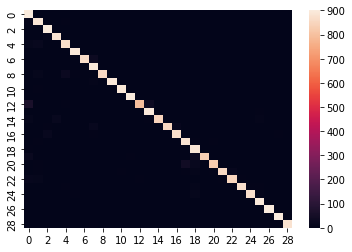

In [ ]:
sns.heatmap(confusion_matrix(y_test, classes_x))
plt.show()

Now that the CNN is done lets test with user input

In [ ]:
import cv2
 
#takes in file location and returns resized cv2 image
def resize_input_image(file_location):
    img = cv2.imread(file_location, cv2.IMREAD_UNCHANGED)
    dim = (64, 64)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    np_image = np.array(resized)
    img_arr = np_image.reshape((-1, imageSize, imageSize, 3))
    return img_arr


In [ ]:
test_img = resize_input_image('/home/a.kocsis/Final Project/adam_K.jpg')

NameError: name 'imageSize' is not defined

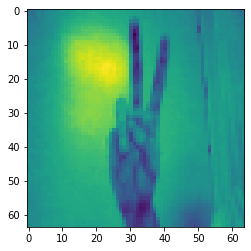

In [ ]:
plt.imshow(test_img[0, :, :, 0])
plt.show()

In [ ]:
test_predict = model.predict(test_img)
test_val=np.argmax(test_predict, axis=1)

In [ ]:
print(test_val)

[10]


In [ ]:
#takes in an array of numbers and returns a sentence

def num_to_letter(numbers):
    sentence = ""
    letters = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", 'Y', 'Z', 'del', "nothing", "space"]
    for i in range(0, len(numbers)):
        if numbers[i] == "del":
            sentence = sentence.rstrip(sentence[-1])
        elif numbers[i] == "nothing":
            break
        elif numbers[i] == "space":
            sentence += " "
        else:
            sentence += letters[numbers[i]]
            
    return sentence

In [ ]:
num_to_letter([0, 1, 3])

'ABD'

In [ ]:
num_to_letter(classes_x[0:8])

NameError: name 'classes_x' is not defined

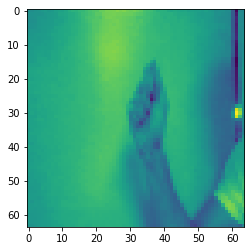

R


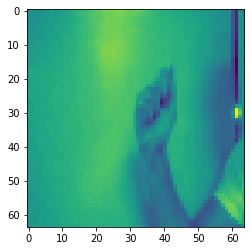

U


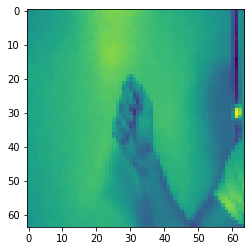

U


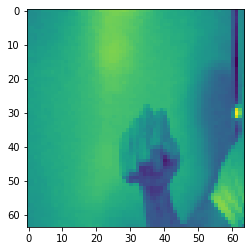

S


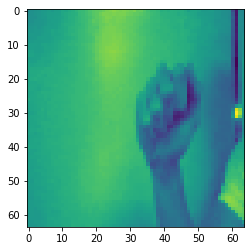

E


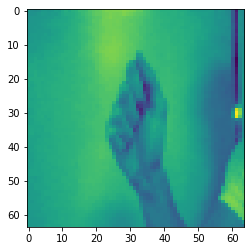

R


In [ ]:
model = keras.models.load_model("CNN_model.h5")

for image_filename in os.listdir('/home/a.kocsis/Final Project/A_test'):
    test_img = resize_input_image('/home/a.kocsis/Final Project/A_test' + '/' + image_filename)
    plt.imshow(test_img[0, :, :, 0])
    plt.show()
    test_predict = model.predict(test_img)
    test_val=np.argmax(test_predict, axis=1)
    print(num_to_letter(test_val))

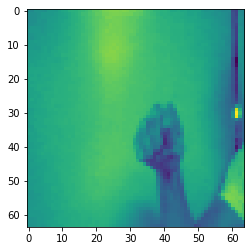

X


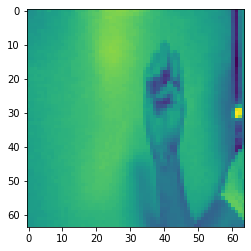

R


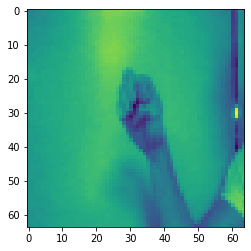

G


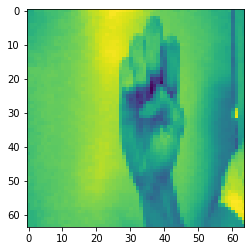

F


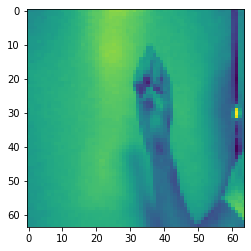

R


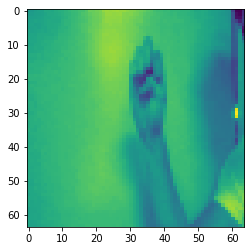

U


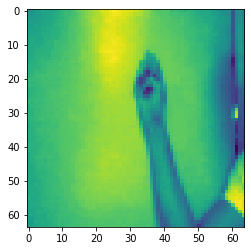

R


In [ ]:
model = keras.models.load_model("CNN_model.h5")

for image_filename in os.listdir('/home/a.kocsis/Final Project/E_test'):
    test_img = resize_input_image('/home/a.kocsis/Final Project/E_test' + '/' + image_filename)
    plt.imshow(test_img[0, :, :, 0])
    plt.show()
    test_predict = model.predict(test_img)
    test_val=np.argmax(test_predict, axis=1)
    print(num_to_letter(test_val))

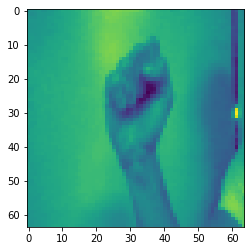

S


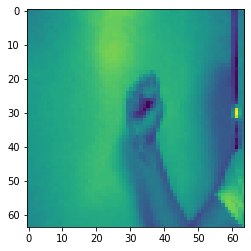

R


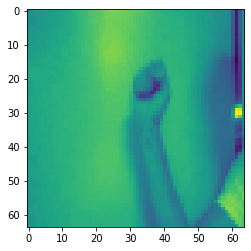

L


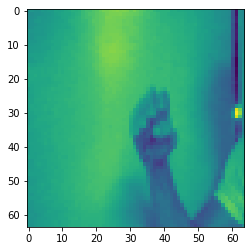

X


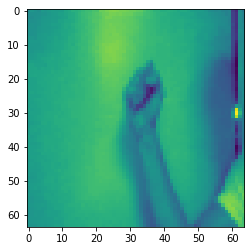

R


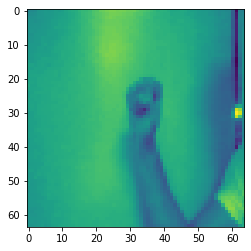

R


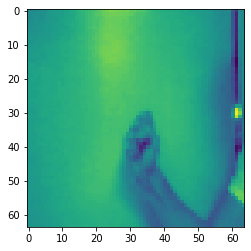

space


In [ ]:
model = keras.models.load_model("CNN_model.h5")

for image_filename in os.listdir('/home/a.kocsis/Final Project/S_test'):
    test_img = resize_input_image('/home/a.kocsis/Final Project/S_test' + '/' + image_filename)
    plt.imshow(test_img[0, :, :, 0])
    plt.show()
    test_predict = model.predict(test_img)
    test_val=np.argmax(test_predict, axis=1)
    print(num_to_letter(test_val))

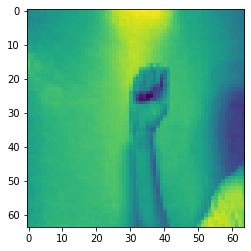

L


In [ ]:
model = keras.models.load_model("CNN_model.h5")


test_img = resize_input_image('/home/a.kocsis/Final Project/adam_A.jpg')
plt.imshow(test_img[0, :, :, 0])
plt.show()
test_predict = model.predict(test_img)
test_val=np.argmax(test_predict, axis=1)
print(num_to_letter(test_val))

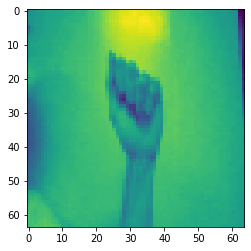

J


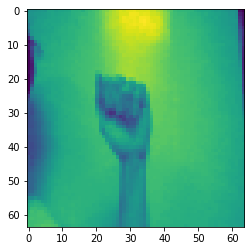

J


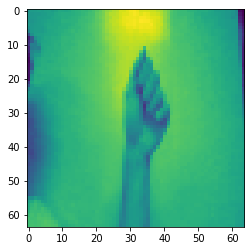

B


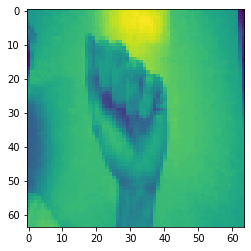

J


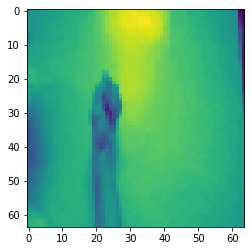

R


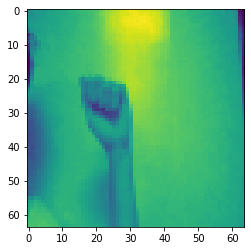

J


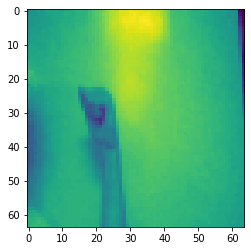

O


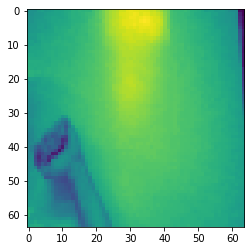

D


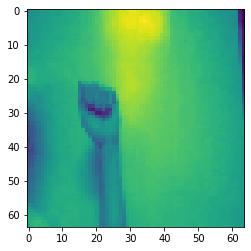

G


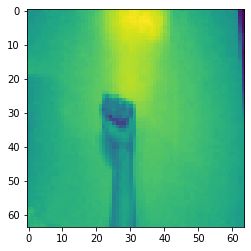

O


In [ ]:
model = keras.models.load_model("CNN_model.h5")

for image_filename in os.listdir('/home/a.kocsis/Final Project/A_left_test'):
    test_img = resize_input_image('/home/a.kocsis/Final Project/A_left_test' + '/' + image_filename)
    plt.imshow(test_img[0, :, :, 0])
    plt.show()
    test_predict = model.predict(test_img)
    test_val=np.argmax(test_predict, axis=1)
    print(num_to_letter(test_val))